<a href="https://colab.research.google.com/github/SalmanAhmed03/Encryptix-MachineLearning/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  


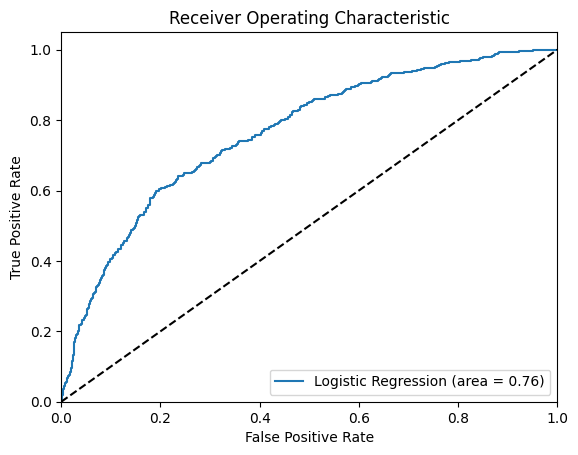

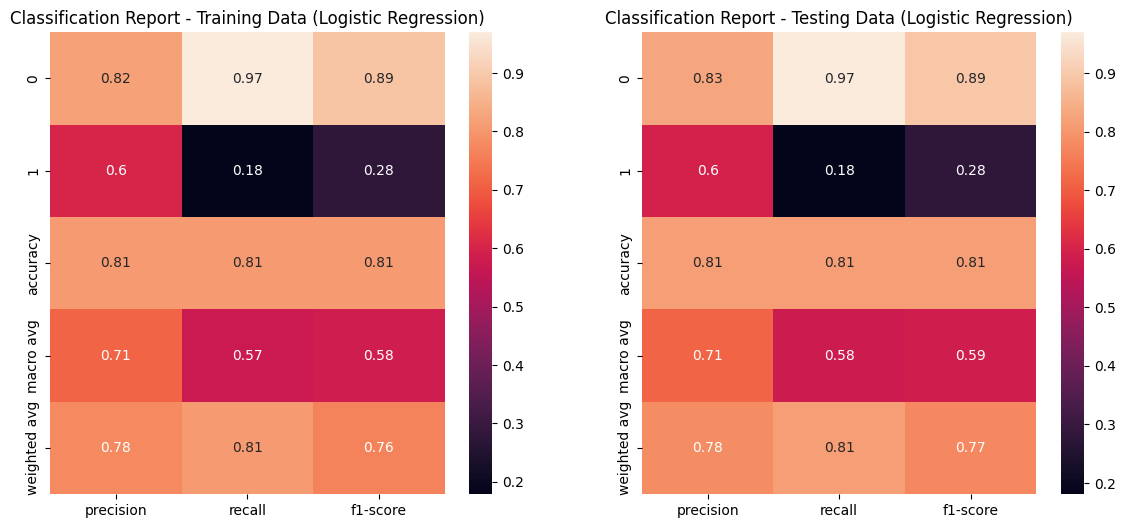

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



# Load the churn data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Data/Churn_Modelling.csv')
print(df.head())
print('--------------------------------------------------------------')
print(df.info())
print('--------------------------------------------------------------')
print(df.describe())
print('--------------------------------------------------------------')

# Drop unnecessary columns
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Gradient Boosting # Train the Gradient Boosting model
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train, y_train)
y_pred_grad_boost = grad_boost.predict(X_test) # Generate predictions

def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rand_forest, "Random Forest")

# Evaluate Gradient Boosting
evaluate_model(y_test, y_pred_grad_boost, "Gradient Boosting")


# Evaluate Gradient Boosting
y_train_pred_log_reg = log_reg.predict(X_train)
y_train_pred_rand_forest = rand_forest.predict(X_train)
y_train_pred_grad_boost = grad_boost.predict(X_train)

print('--------------------------------------------------------------')
print("Classification Report for Training Data (Logistic Regression):")
train_class_report_log_reg = classification_report(y_train, y_train_pred_log_reg)
print(train_class_report_log_reg)
print('--------------------------------------------------------------')

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_log_reg)
print('--------------------------------------------------------------')

# Precision, Recall, F1-score for Logistic Regression
precision_log_reg = conf_matrix_log_reg[1, 1] / (conf_matrix_log_reg[0, 1] + conf_matrix_log_reg[1, 1])
recall_log_reg = conf_matrix_log_reg[1, 1] / (conf_matrix_log_reg[1, 0] + conf_matrix_log_reg[1, 1])
f1_score_log_reg = 2 * (precision_log_reg * recall_log_reg) / (precision_log_reg + recall_log_reg)

print(f"Precision (Logistic Regression): {precision_log_reg}")
print(f"Recall (Logistic Regression): {recall_log_reg}")
print(f"F1-Score (Logistic Regression): {f1_score_log_reg}")
print('--------------------------------------------------------------')

# ROC-AUC for Logistic Regression
y_test_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_test_prob_log_reg)
print(f"ROC-AUC (Logistic Regression): {roc_auc_log_reg}")
print('')
print('')
print('')

# Plot ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _log_reg = roc_curve(y_test, y_test_prob_log_reg)
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (area = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot the results
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred_log_reg, output_dict=True)).iloc[:-1, :].T, annot=True, ax=ax[0])
ax[0].set_title('Classification Report - Training Data (Logistic Regression)')

sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred_log_reg, output_dict=True)).iloc[:-1, :].T, annot=True, ax=ax[1])
ax[1].set_title('Classification Report - Testing Data (Logistic Regression)')

plt.show()